In [1]:
import numpy as np
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot
from keras.preprocessing import sequence

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.models import load_model

In [4]:
import matplotlib.pyplot as plt

## 1. Analisis de Sentimientos usando RNN
---

**Cargar Dataset:** 

In [5]:
np.random.seed(3)

In [6]:
#np.random.seed(3)
#(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, maxlen=500,seed=15)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000,seed=15)

In [7]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [8]:
print("Datos de Entrenamiento: ")
print(X_train.shape)
print(X_test.shape)

Datos de Entrenamiento: 
(25000, 500)
(25000, 500)


**(f) Modifique el numero de palabras mas frecuentes (top words) seleccionadas. Determine como afecta aquello el error de clasificacion.**

Con el fin de poder realizar las pruebas de distintas configuraciones de las arquitecturas a evaluar, se modularizo la creación de un modelo así también el entrenamiento de estos modelos en dos funciones que podemos ver a comunicación:

In [9]:
def createModelo(_top_words, _embedding_vector_length,_input_length,_lstm):
    model = Sequential()
    model.add(Embedding(_top_words, _embedding_vector_length, input_length=_input_length))
    model.add(LSTM(_lstm))
    model.add(Dense(1, activation='sigmoid'))
    return model

A pesar que viemos en que un de Embedding 64 presentaba mejores resultados experimentales, se mantendra uno de 32 por motivos de compración.

### Crear Modelos los 4 modelos TopWords = [1000-3000-6000-9000]

In [10]:
#Caso 1 TopWords = 1000
top_words = 1000
embedding_vector_length = 32 #mejor resultado expereimental
input_length=500
lstm = 100
model_1000 = createModelo(top_words, embedding_vector_length,input_length,lstm)
model_1000.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_1000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 85,301
Trainable params: 85,301
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Caso 2 TopWords = 3000
top_words = 3000
embedding_vector_length = 32 #mejor resultado expereimental
input_length=500
lstm = 100
model_3000 = createModelo(top_words, embedding_vector_length,input_length,lstm)
model_3000.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_3000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           96000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 149,301
Trainable params: 149,301
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Caso 3 TopWords = 6000
top_words = 6000
embedding_vector_length = 32 #mejor resultado expereimental
input_length=500
lstm = 100
model_6000 = createModelo(top_words, embedding_vector_length,input_length,lstm)
model_6000.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_6000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           192000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Caso 4 TopWords = 9000
top_words = 9000
embedding_vector_length = 32 #mejor resultado expereimental
input_length=500
lstm = 100
model_9000 = createModelo(top_words, embedding_vector_length,input_length,lstm)
model_9000.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_9000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           288000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 341,301
Trainable params: 341,301
Non-trainable params: 0
_________________________________________________________________


### Fit Modelos

In [11]:
%%time
history_caso_1000 = model_1000.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_1000.save('modelosF/top_word_1000.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 358s - loss: 0.4834 - acc: 0.7628 - val_loss: 0.4309 - val_acc: 0.8193

In [18]:
%%time
history_caso_3000 = model_3000.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_3000.save('modelosF/top_word_3000.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 348s - loss: 0.5379 - acc: 0.7249 - val_loss: 0.4011 - val_acc: 0.8200

In [19]:
%%time
history_caso_6000 = model_6000.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_6000.save('modelosF/top_word_6000.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 339s - loss: 0.4705 - acc: 0.7702 - val_loss: 0.3633 - val_acc: 0.8435

In [20]:
%%time
history_caso_9000 = model_9000.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_9000.save('modelosF/top_word_9000.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 346s - loss: 0.5745 - acc: 0.7028 - val_loss: 0.4226 - val_acc: 0.8122

### Evaluar modelos
---

In [6]:
model_1000 = load_model('modelosF/top_word_1000.h5')
model_3000 = load_model('modelosF/top_word_3000.h5')
model_6000 = load_model('modelosF/top_word_6000.h5')
model_9000 = load_model('modelosF/top_word_9000.h5')

In [12]:
scores_1000 = model_1000.evaluate(X_test, y_test)
print("")
print("Accuracy del Caso 1 top_word_1000 = : %.2f%%" % (scores_1000[1]*100))
print("Loss del modelo Caso 1: %.2f%%" % (scores_1000[0]*100))

25000/25000 [==============================] - 109s     

In [14]:
scores_3000 = model_3000.evaluate(X_test, y_test)
print("")
print("Accuracy del Caso 2 top_word_3000 = %.2f%%" % (scores_3000[1]*100))
print("Loss del modelo Caso 2: %.2f%%" % (scores_3000[0]*100))

25000/25000 [==============================] - 109s     

In [15]:
scores_6000 = model_6000.evaluate(X_test, y_test)
print("")
print("Accuracy del Caso 3 top_word_6000 = %.2f%%" % (scores_6000[1]*100))
print("Loss del modelo Caso 3: %.2f%%" % (scores_6000[0]*100))

25000/25000 [==============================] - 109s     

In [16]:
scores_9000 = model_9000.evaluate(X_test, y_test)
print("")
print("Accuracy del Caso 4 top_word_9000 = %.2f%%" % (scores_9000[1]*100))
print("Loss del modelo Caso 4: %.2f%%" % (scores_9000[0]*100))

25000/25000 [==============================] - 109s     

### Comentarios
---

<h3 align = 'center'> Variables </h3>

|embedding_length | top_words | input_length | Total params | time_traning |Accuracy
| :-: | :-: | :-: | :-: | :-: |:-: |:-: |
|32|1000|500| 85,301| 17min 36s| 85.57%|
|32|3000|500| 149,301| 17min 24s| 86.37%|
|32|6000|500| 245,301| 16min 55s| 88.00%|
|32|9000|500| 341,301| 17min 15s| 85.99%|

Con respecto a la actividad anterior no se ven cambios muy significativos ni en tiempos de entrenamiento, ni tampoco en el Accuracy salvo que logramos uno mejor con 6000 top_words. Esto si nos puede llevar a pensaer que un aumento en el numero de top_words, en este caso de un 100%, no dara una mejora en el Accuracy ahora bien esto tampoco es una relación lineal pues con 9000 disminuye.

Ahora en los graficos si se observa una relación en las curvas de aprendizaje mas estable con el aumento de las top_words

### Graficos de curvas
---

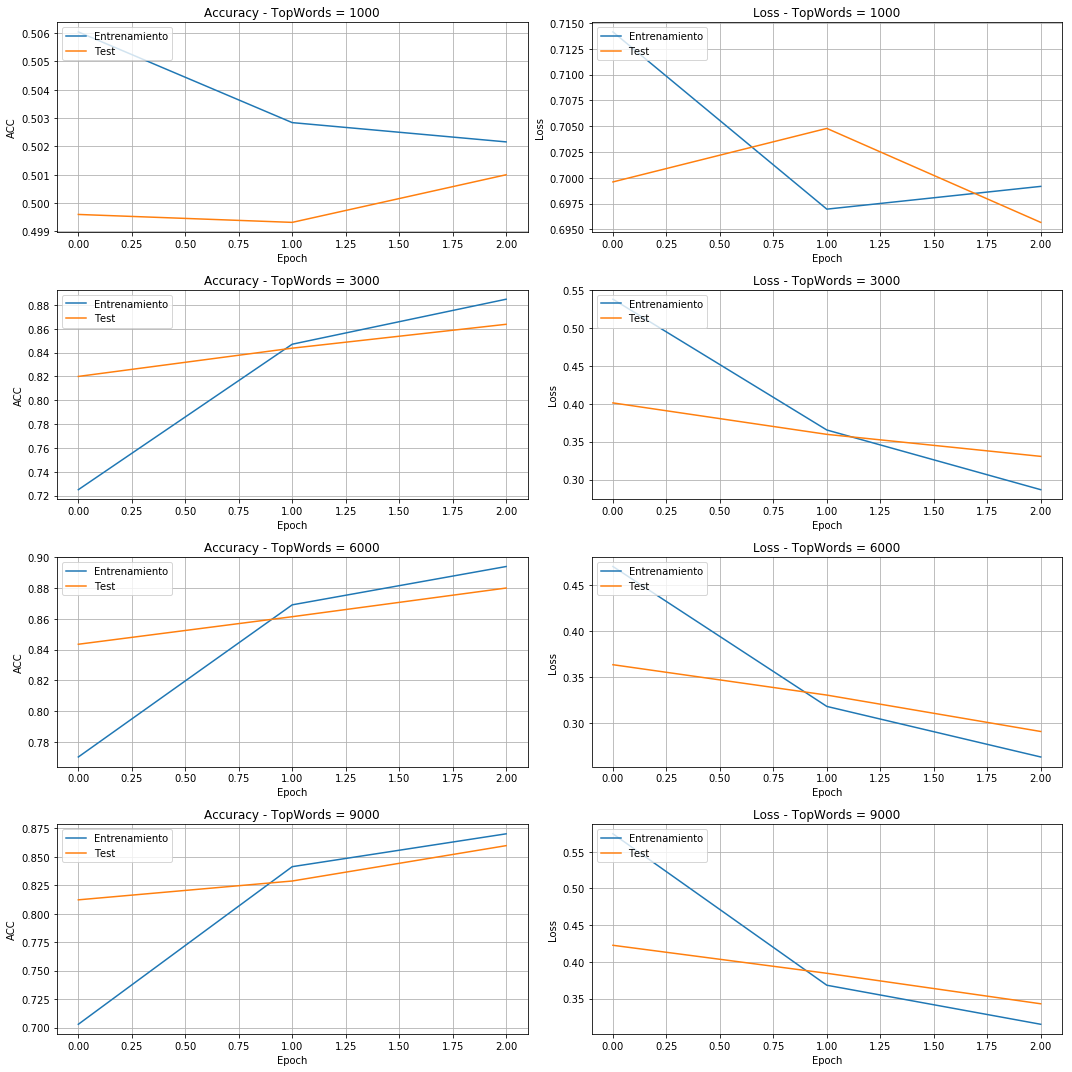

In [25]:
plt.figure(figsize=(15, 15))
#####
plt.subplot(4, 2, 1)
plt.plot(history_caso_1000.history['acc'])  
plt.plot(history_caso_1000.history['val_acc'])  
plt.title('Accuracy - TopWords = 1000')  
plt.ylabel('ACC')  
plt.xlabel('Epoch')  
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.grid(True)

plt.subplot(4, 2, 2)
plt.plot(history_caso_1000.history['loss'])  
plt.plot(history_caso_1000.history['val_loss'])  
plt.title('Loss - TopWords = 1000')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['Entrenamiento', 'Test'], loc='upper left')  
plt.grid(True)
######
plt.subplot(4, 2, 3)
plt.plot(history_caso_3000.history['acc'])  
plt.plot(history_caso_3000.history['val_acc'])  
plt.title('Accuracy - TopWords = 3000')  
plt.ylabel('ACC')  
plt.xlabel('Epoch')  
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.grid(True)

plt.subplot(4, 2, 4)
plt.plot(history_caso_3000.history['loss'])  
plt.plot(history_caso_3000.history['val_loss'])  
plt.title('Loss - TopWords = 3000')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.grid(True)

#######

plt.subplot(4, 2, 5)
plt.plot(history_caso_6000.history['acc'])  
plt.plot(history_caso_6000.history['val_acc'])  
plt.title('Accuracy - TopWords = 6000')  
plt.ylabel('ACC')  
plt.xlabel('Epoch')  
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.grid(True)

plt.subplot(4, 2, 6)
plt.plot(history_caso_6000.history['loss'])  
plt.plot(history_caso_6000.history['val_loss'])  
plt.title('Loss - TopWords = 6000')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['Entrenamiento', 'Test'], loc='upper left')  
plt.grid(True)
####

plt.subplot(4, 2, 7)
plt.plot(history_caso_9000.history['acc'])  
plt.plot(history_caso_9000.history['val_acc'])  
plt.title('Accuracy - TopWords = 9000')  
plt.ylabel('ACC')  
plt.xlabel('Epoch')  
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.grid(True)

plt.subplot(4, 2, 8)
plt.plot(history_caso_9000.history['loss'])  
plt.plot(history_caso_9000.history['val_loss'])  
plt.title('Loss - TopWords = 9000')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()